In [1]:
import pandas as pd

### Statistics Canada, 2016 Census

[Census Profile, 2016 Census](https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/index.cfm?Lang=E)

#### Download dataset

Aggregate Dissemination Area (ADA) geographic level

```
wget -O 98-401-X2016050_eng_CSV.zip https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/details/download-telecharger/comp/GetFile.cfm?Lang=E&FILETYPE=CSV&GEONO=050
```

#### Read dataset

In [2]:
# Tall CSV file
df_raw = pd.read_csv('98-401-X2016050_eng_CSV/98-401-X2016050_English_CSV_data.csv', low_memory=False)

#### Select columns to keep, and give new names to each of them

In [3]:
columns_to_keep = ['GEO_CODE (POR)',
                   'GEO_LEVEL',
                   'DIM: Profile of Aggregate Dissemination Areas (2247)',
                   'Dim: Sex (3): Member ID: [1]: Total - Sex']

In [4]:
df = df_raw[columns_to_keep]

In [5]:
columns_new_names = ['geo_code',
                    'geo_level',
                    'metric_name',
                    'metric_total_value']

In [6]:
column_name_dict = dict(zip(columns_to_keep, columns_new_names))

In [7]:
df = df.rename(columns = column_name_dict)

### Filter rows for ADA, geo_level=3

In [8]:
mask_geo_level = (df['geo_level'] == 3)

In [9]:
df = df[mask_geo_level]

In [10]:
df.shape

(12102342, 4)

In [11]:
df.head()

,geo_code,geo_level,metric_name,metric_total_value
6741,10010001,3,"Population, 2016",9334
6742,10010001,3,"Population, 2011",...
6743,10010001,3,"Population percentage change, 2011 to 2016",...
6744,10010001,3,Total private dwellings,5620
6745,10010001,3,Private dwellings occupied by usual residents,4053


In [12]:
df.drop(columns='geo_level', inplace=True)

#### Convert metric_total_value to numeric and coerce to NaN if non-numeric

In [13]:
df['metric_total_value'] = pd.to_numeric(df['metric_total_value'], errors='coerce')

In [14]:
df.dropna(inplace=True)

In [15]:
# Around a tenth of the rows are dropped
df.shape

(10977128, 3)

In [16]:
df.head()

,geo_code,metric_name,metric_total_value
6741,10010001,"Population, 2016",9334.00
6744,10010001,Total private dwellings,5620.00
6745,10010001,Private dwellings occupied by usual residents,4053.00
6746,10010001,Population density per square kilometre,9.80
6747,10010001,Land area in square kilometres,949.19


#### Metrics to use

In [17]:
metric_list = df['metric_name'].unique()

In [18]:
'Total - Private households by tenure - 25% sample data' in metric_list

True

In [19]:
metrics_to_keep = ['Population, 2016',
                   'Population density per square kilometre',
                   'Land area in square kilometres',
                   'Average age of the population',
                   'Median age of the population',
                   'Median after-tax income in 2015 among recipients ($)',
                   'Average after-tax income in 2015 among recipients ($)',
                   'Non-immigrants',
                   'Immigrants',
                   'Total - Private households by tenure - 25% sample data',
                   'Owner',
                   'Renter',
                   'Condominium',
                   'Not condominium',
                   'Median monthly shelter costs for owned dwellings ($)',
                   'Average monthly shelter costs for owned dwellings ($)',
                   'Median value of dwellings ($)',
                   'Average value of dwellings ($)',
                   'Median monthly shelter costs for rented dwellings ($)',
                   'Average monthly shelter costs for rented dwellings ($)',
                   'In the labour force',
                   'Employed',
                   'Unemployed',
                   'Not in the labour force',
                   'Participation rate',
                   'Employment rate',
                   'Unemployment rate']

In [20]:
i=0
for metric in metrics_to_keep:
    if metric not in metric_list:
        print(metric)

In [21]:
mask_metrics = (df['metric_name'].isin(metrics_to_keep))

In [22]:
df = df[mask_metrics]

In [23]:
# About 1/100 as many rows after mask as before
df.shape

(133591, 3)

In [24]:
# Used this to get uniqueness for pivot table; should not have been required because
# there should not be duplicates. It is no longer required.
# df[['geo_code', 'metric_name', 'metric_total_value']].drop_duplicates(inplace=True)
# Same number of rows as before dropping duplicates - namely no duplicate rows.
# df.shape

In [25]:
df.head()

,geo_code,metric_name,metric_total_value
6741,10010001,"Population, 2016",9334.00
6746,10010001,Population density per square kilometre,9.80
6747,10010001,Land area in square kilometres,949.19
6779,10010001,Average age of the population,49.10
6780,10010001,Median age of the population,53.70


In [26]:
df.shape

(133591, 3)

#### Pivot table

In [27]:
df_wide = df.pivot(index = 'geo_code', columns = 'metric_name', values = 'metric_total_value')

In [28]:
df_wide.columns.tolist()

['Average after-tax income in 2015 among recipients ($)',
 'Average age of the population',
 'Average monthly shelter costs for owned dwellings ($)',
 'Average monthly shelter costs for rented dwellings ($)',
 'Average value of dwellings ($)',
 'Condominium',
 'Employed',
 'Employment rate',
 'Immigrants',
 'In the labour force',
 'Land area in square kilometres',
 'Median after-tax income in 2015 among recipients ($)',
 'Median age of the population',
 'Median monthly shelter costs for owned dwellings ($)',
 'Median monthly shelter costs for rented dwellings ($)',
 'Median value of dwellings ($)',
 'Non-immigrants',
 'Not condominium',
 'Not in the labour force',
 'Owner',
 'Participation rate',
 'Population density per square kilometre',
 'Population, 2016',
 'Renter',
 'Total - Private households by tenure - 25% sample data',
 'Unemployed',
 'Unemployment rate']

In [29]:
df_wide.head()

metric_name,Average after-tax income in 2015 among recipients ($),Average age of the population,Average monthly shelter costs for owned dwellings ($),Average monthly shelter costs for rented dwellings ($),Average value of dwellings ($),Condominium,Employed,Employment rate,Immigrants,In the labour force,...,Not condominium,Not in the labour force,Owner,Participation rate,Population density per square kilometre,"Population, 2016",Renter,Total - Private households by tenure - 25% sample data,Unemployed,Unemployment rate
geo_code,,,,,,,,,,,,,,,,,,,,,
10010001,30657.0,49.1,625.0,721.0,169524.0,10.0,3410.0,41.7,90.0,4095.0,...,4040.0,4075.0,3715.0,50.1,9.8,9334.0,340.0,4050.0,690.0,16.8
10010002,38844.0,38.7,1224.0,951.0,317514.0,10.0,2045.0,60.1,65.0,2315.0,...,1580.0,1090.0,1435.0,68.0,45.5,4204.0,150.0,1590.0,270.0,11.7
10010003,33247.0,45.8,824.0,735.0,219755.0,60.0,4200.0,43.5,100.0,5155.0,...,4705.0,4490.0,3945.0,53.4,58.5,11417.0,820.0,4765.0,955.0,18.5
10010004,52703.0,44.5,1412.0,1043.0,407155.0,285.0,4735.0,57.7,965.0,5120.0,...,3680.0,3085.0,3000.0,62.4,296.3,10406.0,965.0,3965.0,385.0,7.5
10010005,46622.0,37.4,1491.0,979.0,383891.0,15.0,4785.0,64.8,150.0,5175.0,...,3400.0,2205.0,2930.0,70.1,189.5,9442.0,480.0,3415.0,385.0,7.4


In [30]:
df_wide.shape

(5386, 27)

In [31]:
df_wide.dropna(inplace=True)

In [32]:
df_wide.shape

(4613, 27)

#### Matplotlib inspection

In [33]:
import matplotlib.pyplot as plt

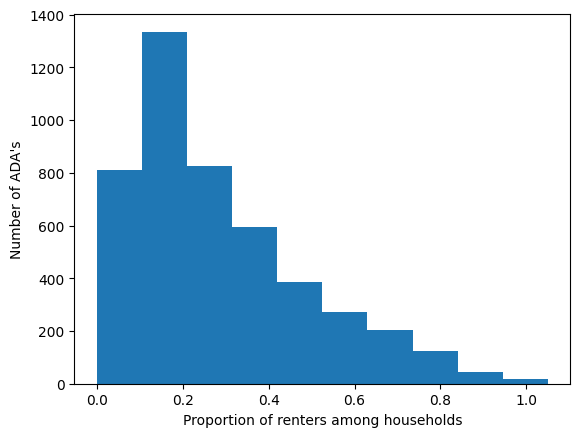

In [34]:
fig, ax = plt.subplots()
ax.hist(df_wide['Renter'] / df_wide['Total - Private households by tenure - 25% sample data'])
ax.set_xlabel("Proportion of renters among households")
ax.set_ylabel("Number of ADA's")
plt.show()

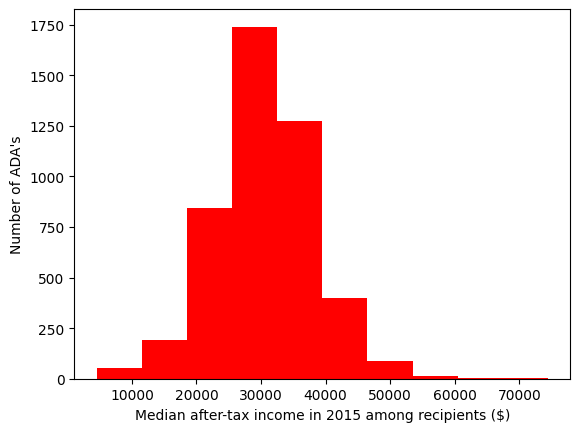

In [35]:
fig, ax = plt.subplots()
ax.hist(df_wide['Median after-tax income in 2015 among recipients ($)'], color='r')
ax.set_xlabel("Median after-tax income in 2015 among recipients ($)")
ax.set_ylabel("Number of ADA's")
plt.show()

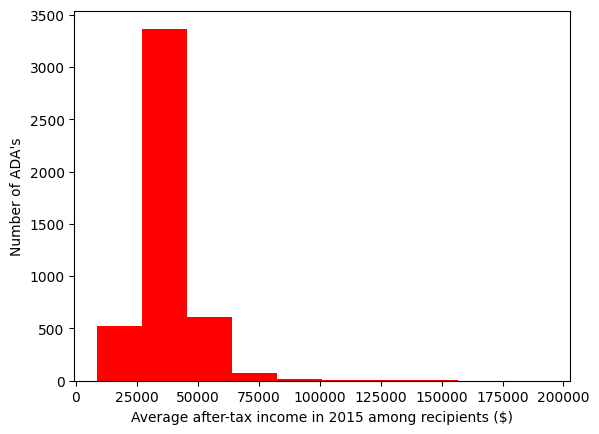

In [36]:
fig, ax = plt.subplots()
ax.hist(df_wide['Average after-tax income in 2015 among recipients ($)'], color='r')
ax.set_xlabel("Average after-tax income in 2015 among recipients ($)")
ax.set_ylabel("Number of ADA's")
plt.show()

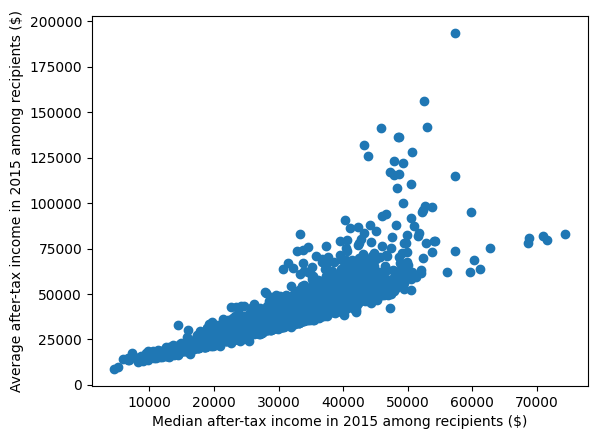

In [37]:
fig, ax = plt.subplots()
ax.scatter(df_wide['Median after-tax income in 2015 among recipients ($)'], \
           df_wide['Average after-tax income in 2015 among recipients ($)'])
ax.set_xlabel('Median after-tax income in 2015 among recipients ($)')
ax.set_ylabel('Average after-tax income in 2015 among recipients ($)')
plt.show()

#### scikit-learn

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression 

In [39]:
target_column = 'Average after-tax income in 2015 among recipients ($)'
feature_columns = metrics_to_keep.copy()
feature_columns.remove(target_column)

In [40]:
feature_columns

['Population, 2016',
 'Population density per square kilometre',
 'Land area in square kilometres',
 'Average age of the population',
 'Median age of the population',
 'Median after-tax income in 2015 among recipients ($)',
 'Non-immigrants',
 'Immigrants',
 'Total - Private households by tenure - 25% sample data',
 'Owner',
 'Renter',
 'Condominium',
 'Not condominium',
 'Median monthly shelter costs for owned dwellings ($)',
 'Average monthly shelter costs for owned dwellings ($)',
 'Median value of dwellings ($)',
 'Average value of dwellings ($)',
 'Median monthly shelter costs for rented dwellings ($)',
 'Average monthly shelter costs for rented dwellings ($)',
 'In the labour force',
 'Employed',
 'Unemployed',
 'Not in the labour force',
 'Participation rate',
 'Employment rate',
 'Unemployment rate']

In [41]:
df_wide.head()

metric_name,Average after-tax income in 2015 among recipients ($),Average age of the population,Average monthly shelter costs for owned dwellings ($),Average monthly shelter costs for rented dwellings ($),Average value of dwellings ($),Condominium,Employed,Employment rate,Immigrants,In the labour force,...,Not condominium,Not in the labour force,Owner,Participation rate,Population density per square kilometre,"Population, 2016",Renter,Total - Private households by tenure - 25% sample data,Unemployed,Unemployment rate
geo_code,,,,,,,,,,,,,,,,,,,,,
10010001,30657.0,49.1,625.0,721.0,169524.0,10.0,3410.0,41.7,90.0,4095.0,...,4040.0,4075.0,3715.0,50.1,9.8,9334.0,340.0,4050.0,690.0,16.8
10010002,38844.0,38.7,1224.0,951.0,317514.0,10.0,2045.0,60.1,65.0,2315.0,...,1580.0,1090.0,1435.0,68.0,45.5,4204.0,150.0,1590.0,270.0,11.7
10010003,33247.0,45.8,824.0,735.0,219755.0,60.0,4200.0,43.5,100.0,5155.0,...,4705.0,4490.0,3945.0,53.4,58.5,11417.0,820.0,4765.0,955.0,18.5
10010004,52703.0,44.5,1412.0,1043.0,407155.0,285.0,4735.0,57.7,965.0,5120.0,...,3680.0,3085.0,3000.0,62.4,296.3,10406.0,965.0,3965.0,385.0,7.5
10010005,46622.0,37.4,1491.0,979.0,383891.0,15.0,4785.0,64.8,150.0,5175.0,...,3400.0,2205.0,2930.0,70.1,189.5,9442.0,480.0,3415.0,385.0,7.4


In [42]:
X = df_wide[feature_columns].values
y = df_wide[target_column].values

In [43]:
lm = LinearRegression()

In [44]:
model = lm.fit(X,y)

In [45]:
predictions  =  model.predict(X)
score        =  model.score(X, y)

In [46]:
print(model.coef_)
print(model.intercept_)

[ 1.32597160e-01 -5.29098852e-02 -1.59828662e-02 -6.25708202e+01
 -1.20704063e+02  1.44663036e+00 -6.92387502e-01 -8.71809379e-01
 -1.89657188e+01 -1.81469494e+00 -1.87803723e+00  2.09717460e+01
  2.10086632e+01 -8.90823067e+00  1.15784651e+01 -3.60382216e-02
  4.17034951e-02 -2.75804660e-01 -1.04543371e+00 -1.69718654e+01
  1.73222259e+01  2.12003803e+01  2.16394447e-01  4.42951199e+02
 -7.64903332e+02 -2.38893217e+02]
13530.39083604265


In [47]:
from sklearn.metrics import r2_score

print(r2_score(y, predictions))

0.8444531517742869


For pushing this further, I'd want to do feature engineering, maybe normalizing all data to be in the form of ratios

In [48]:
feature_columns = ['Median after-tax income in 2015 among recipients ($)',
                   'Median monthly shelter costs for owned dwellings ($)',
                   'Average monthly shelter costs for owned dwellings ($)',
                   'Median value of dwellings ($)',
                   'Average value of dwellings ($)',
                   'Median monthly shelter costs for rented dwellings ($)',
                   'Average monthly shelter costs for rented dwellings ($)',
                   'Participation rate']

In [49]:
X = df_wide[feature_columns].values
y = df_wide[target_column].values

In [50]:
lm = LinearRegression()

In [51]:
model = lm.fit(X,y)

In [52]:
predictions  =  model.predict(X)
score        =  model.score(X, y)

In [53]:
print(model.coef_)
print(model.intercept_)

[ 1.34382872e+00 -6.40130401e+00  6.30570095e+00 -3.62557437e-02
  4.34817207e-02 -6.64151701e-01 -9.79970641e-01 -1.81132123e+02]
4789.74679673303


In [54]:
print(r2_score(y, predictions))

0.8161240132513918
